# The Sparks Foundation 

# Graduate Rotational Internship program(GRIP) Batch July'21

By:Titasta Bose

# Problem statement:-
    
Predict the percentage of an student based on the no. of study hours.

# Importing the libraries:-

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

In [2]:
url = "http://bit.ly/w-data"
mydf = pd.read_csv(url)
print("Data imported successfully")
mydf

Data imported successfully


,Hours,Scores
0,2.500000,21
1,5.100000,47
2,3.200000,27
3,8.500000,75
4,3.500000,30
5,1.500000,20
6,9.200000,88
7,5.500000,60
8,8.300000,81
9,2.700000,25


# Checking for shapes:-

In [3]:
mydf.shape

(25, 2)

In [4]:
mydf.dtypes

Hours     float64
Scores      int64
dtype: object

# Checking for null values:-

In [5]:
mydf.isnull().sum()

Hours     0
Scores    0
dtype: int64

# interpretation:-
    
The data contains no null value.

In [6]:
mydf.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Basic EDA to understand the Dataset better:-
    

Let us first observe whether there is any relationship between the independent and dependent variable or not:

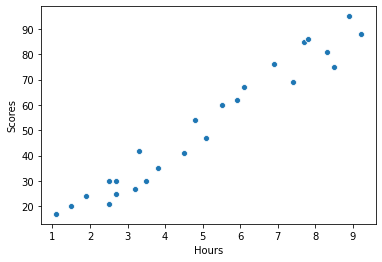

In [7]:
sns.scatterplot(x=mydf.Hours,y=mydf.Scores)

# Intepretation:-
    
we can interpret the more is the number of hour the more is the score.

# Checking for skewness:-

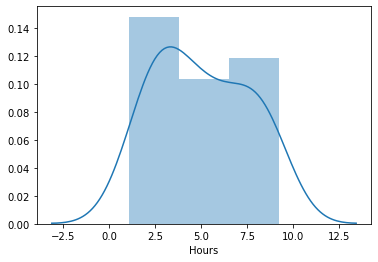

In [11]:
sns.distplot(mydf['Hours'])

In [12]:
mydf['Hours'].skew()

0.1903382010052985

# Interpretation:-
    
Hours is little bit skewed.we use square root transformation to remove skewness.

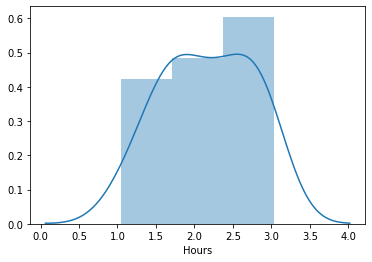

In [17]:
sns.distplot(np.sqrt(mydf['Hours']))

In [18]:
np.sqrt(mydf['Hours']).skew()

-0.14876804547778097

# Interpreattion:-
    
skewness is reduced.

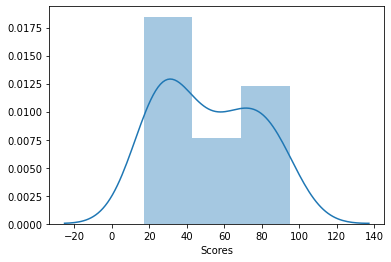

In [13]:
sns.distplot(mydf['Scores'])

In [14]:
mydf['Scores'].skew()

0.2339646665397317

# Interpretation:-
    
scores is little bit skewed.we use square root transformation to reduce skewness.

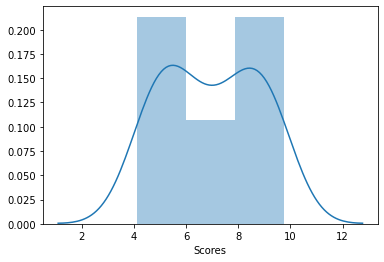

In [21]:
sns.distplot(np.sqrt(mydf['Scores']))

In [22]:
np.sqrt(mydf['Scores']).skew()

0.009461531238643123

# Interpreattion:-
    
skewness is reduced.

# Data Pre-Processing:-

This steps involves diving data to features(x) and labels(y).

In [39]:
y=mydf['Scores']
X=mydf['Hours']

Splitting the dataset into Train set and Test set:-

~ we are diving the data set in 80:20 ratio.i.e train set contains 80% and test set contains 20% of the total data.

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(20,) (5,) (20,) (5,)


# Training the Model:

We have split our data into training and testing sets, and now is finally the time to train our algorithm.We will use Scikit Learn approach to train our data.

In [46]:
y=np.array(mydf['Scores'])
X=np.array(mydf['Hours'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

from sklearn.linear_model import LinearRegression
reg_model=LinearRegression()
reg_model.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

# Interpretation:-
    
Model is trained with 80% data.our next step is to test the data using the trained data.

# Testing The model:

Initializing the test Result.

In [49]:
y_pred=reg_model.predict(X_test.reshape(-1,1))
y_pred

array([17.37142335, 52.70292295, 35.03717315, 34.05574261, 46.81433968])

In [55]:
y_test

array([20, 47, 42, 27, 41], dtype=int64)

# Comparing the Actual and predicted value:-

In [72]:
y_pred_val=pd.Series(y_pred)
y_test_val=pd.Series(y_test)
df=pd.concat([y_test_val,y_pred_val],axis=1)
df=df.rename(columns={0:'Actual',1:'Predicted'})
df

,Actual,Predicted
0,20,17.371423
1,47,52.702923
2,42,35.037173
3,27,34.055743
4,41,46.814340


# Estimting the training score and test score:-

In [67]:
print('Training score:',reg_model.score(X_train.reshape(-1,1),y_train))
print('Test score:',reg_model.score(X_test.reshape(-1,1),y_test))

Training score: 0.95807022445042
Test score: 0.6683995499740194


# Interpretation:-
    
here we have seen the training score is more than the test score.henec we can conclude that the model is overfitted.


# Plotting bargraph to see the difference between actual and predicted value:-

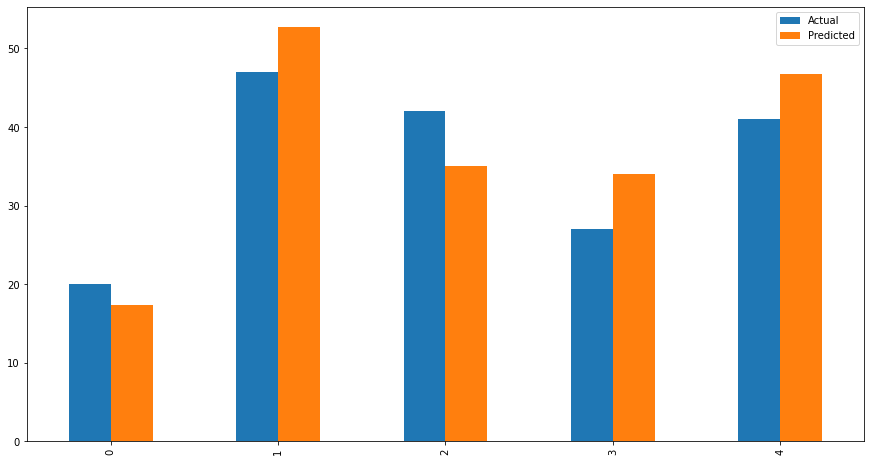

In [73]:
df.plot(kind='bar',figsize=(15,8))

we can see the difference between actual and predicted value.

# Plotting the regression line:-

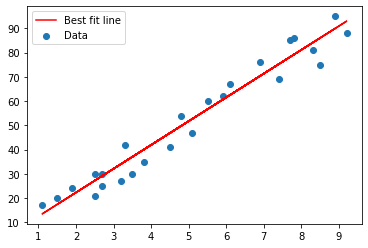

In [70]:
line=reg_model.coef_*X+reg_model.intercept_
plt.scatter(X,y,label='Data')
plt.plot(X,line,label='Best fit line',color='r')
plt.legend()

# Making own predictions:

In [77]:
hours=9.25
hour_arr=np.array([hours])
hours_reshape=hour_arr.reshape(-1,1)
own_pred = reg_model.predict(hours_reshape)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.43229053722452
